# K-Nearest Neighbors

This notebook will discuss the K-Nearest Neighbors algorithm to solve a classification problem. We will be discussing theory first and then move on to a practical example.

It's inspired by the IBM's Machine Learning with Python course.

# What is K-Nearest Neighbors?

**K-Nearest Neighbors** is an algorithm for supervised learning. In this algorithm, the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

It **assumes** that data with similar class would be 'together.'

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.


## Advantages

* It's a fairly simple machine learning model.
* Has few hyperparameters to tune.
* The algorithm is versatile as it can be used for classification, regression, and search.

## Disadvantages

* Choosing the proper value of K is critical.
* Can have very large computation cost during runtime if number of predictors is large. The general rule of thumb is to have less than 50,000 rows.
* Although Euclidean Distance works most of time, care must sometimes be taken to ensure for fair treatment among features.

## Choosing K
* As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
* Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
* In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

# Practical Example

Imagine a telecommunications provider has segmented its customer base by service usage patterns and categorized the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 

We can see that it is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Lets load required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## Load Data From CSV File

In [2]:
df = pd.read_csv('Datasets/Telecom Data.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


Let’s see how many of each class is in our data set

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

As we can see, we have 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

You can easily explore your data using visualization techniques:


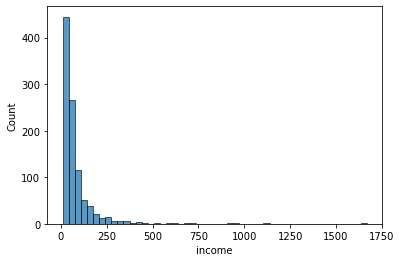

In [4]:
# df.hist(column='income', bins=50)
sns.histplot(data=df['income'], bins=50);

### Feature set

Lets define feature sets, X:


In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


What are our labels?


In [7]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance. For algorithms such as KNN, which is based on distance of cases, it is a good idea to do so.

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test Split

We will split the data into training and testing portions to get Out-of-sample metrics. This will help us to find how accurate the model is and whether if it under/overfits.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

## Using the KNN Algorithm

### Import library


In [10]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4.

In [11]:
k = 4
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

### Predicting

We will now use the model to predict the test set:

In [12]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Accuracy evaluation

We would be using Accuracy and the Jaccard Index to evaluate this model. 

In [13]:
from sklearn import metrics
yhat_train = neigh.predict(X_train)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Train set Jaccard Index (micro): ", metrics.jaccard_score(y_train, yhat_train, average='micro'))
print("Test set Jaccard Index (micro): ", metrics.jaccard_score(y_test, yhat, average='micro'))
print("Train set Jaccard Index (macro): ", metrics.jaccard_score(y_train, yhat_train, average='macro'))
print("Test set Jaccard Index (macro): ", metrics.jaccard_score(y_test, yhat, average='macro'))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32
Train set Jaccard Index (micro):  0.3769363166953528
Test set Jaccard Index (micro):  0.19047619047619047
Train set Jaccard Index (macro):  0.3687477446128467
Test set Jaccard Index (macro):  0.18667128030629954


From the above scores, we can see that we are accurate 0.32 times whereas our Jaccard Index (both micro and macro) are fairly low. This means that we are likely getting a few classes highly wrong. Let's see if that's true.

In [14]:
print("Train set Jaccard Index (all): ", metrics.jaccard_score(y_train, yhat_train, average=None))
print("Test set Jaccard Index (all): ", metrics.jaccard_score(y_test, yhat, average=None))

Train set Jaccard Index (all):  [0.425      0.34016393 0.40566038 0.30416667]
Test set Jaccard Index (all):  [0.2254902  0.21052632 0.18390805 0.12676056]


Yup. Anyway, we need to figure out a way to get our model be better. Let's try tuning the *K* parameter 

## Tuning *K* 

A good maximal value is generally the sqrt of the number of rows. 

Let's find the shape of dataset first.

In [15]:
df.shape

(1000, 12)

So then our maximal K should be 32 since $sqrt(1000) =~ 31.6$
The next step is to calculate the scores for various Ks

In [16]:
Ks = 32
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395])

#### Plot  model accuracy  for Different number of Neighbors


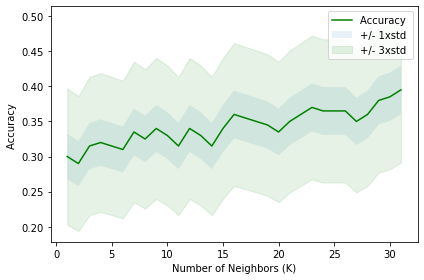

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.395 with k= 31


Not that great of a model. But it illustrates the import points of creating a KNN Model. At this point, it will be better to use Logistic Regression, Random Forests or SVMs.  

# Author
By Abhinav Garg